# Now with the initial knowledge you may like to rotate your plot to see a better view:

More information: This part of the code is written in the analysis of the two yellow line bands in the emission spectrum of the mercury atom, which are located at the wavelengths of 576.959 and 579.065, with Gain $= 27.0$ and Exposure Time $= 900000$

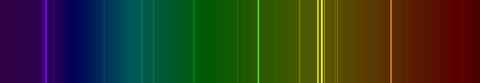

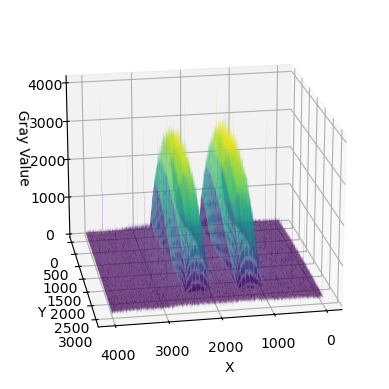

In [ ]:
img_transposed = img.T
Y, X = np.meshgrid(np.arange(img_transposed.shape[1]), np.arange(img_transposed.shape[0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, img_transposed, cmap='viridis')  # You can choose any colormap you like

# Rotate the plot 90 degrees around the z-axis
ax.view_init(elev=20, azim=800)  # Adjust elev (elevation) and azim (azimuth) as needed

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Gray Value')
plt.show()


# **(OPTIONAL)** you can also save your camera's data in a text file too:

In [ ]:
import pandas as pd
import numpy as np
img_transposed = img.T
X, Y = np.meshgrid(np.arange(img_transposed.shape[1]), np.arange(img_transposed.shape[0]))

# Flatten the arrays to save as columns in a text file
X_flat = X.flatten()
Y_flat = Y.flatten()
img_flat = img_transposed.flatten()

# Save the data to a text file
data = np.column_stack((X_flat, Y_flat, img_flat))
text_file_output_path = r'C:\Users\Hesam Mozafarinia\OneDrive\Desktop\3d_data.txt'

# Using numpy.savetxt to save the data
np.savetxt(text_file_output_path, data, fmt='%d %d %d', header='X Y Gray Value', comments='')

print(f"3D data saved to {text_file_output_path}")

3D data saved to C:\Users\Hesam Mozafarinia\OneDrive\Desktop\3d_data.txt


# saving the picture in jpg format

In [ ]:
ipo = pylon.ImagePersistenceOptions()
quality = 90 * 10
ipo.SetQuality(quality)
filename = f"saved_pypylon_img_{quality}.jpeg"
from PIL import Image
import numpy as np
image_pil = Image.fromarray(np.uint8(img))
output_filename = "saved_pypylon_Hg.jpg"
image_pil.save(output_filename, format="JPEG", quality=90)
print(f"Image saved as {output_filename}")

Image saved as saved_pypylon_Hg.jpg


# drawing a contour plot to show the intensity

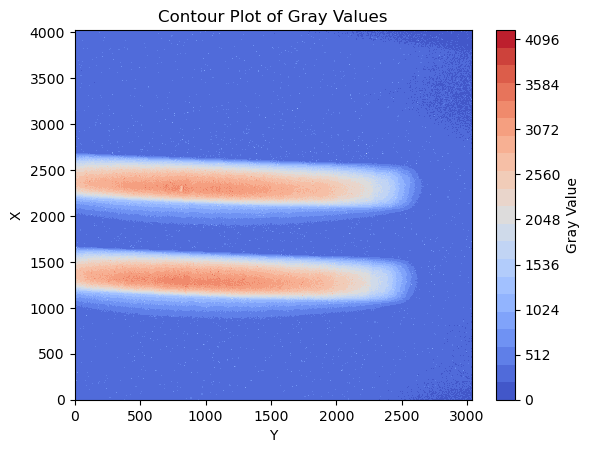

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img_transposed = img.T
X, Y = np.meshgrid(np.arange(img_transposed.shape[1]), np.arange(img_transposed.shape[0]))
plt.contourf(X, Y, img_transposed, levels=20, cmap='coolwarm')  # Adjust 'levels' as needed
cbar = plt.colorbar(label='Gray Value')
cbar.set_ticks(np.linspace(0, 4096, 9))
plt.xlabel('Y')
plt.ylabel('X')
plt.title('Contour Plot of Gray Values')
plt.show()

# Taking $Y index = 1000$ and calculating the **width of the bright lines** and the **distance between them** approximately.

*(you can use this method to calculate $\frac{nm}{pixel}$ value for the sensor of your camera)*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img_transposed is already defined
img_transposed = img.T
X, Y = np.meshgrid(np.arange(img_transposed.shape[1]), np.arange(img_transposed.shape[0]))

# Filter X indices between 1300 and 2400
x_indices = np.arange(img_transposed.shape[1])
filtered_x_indices = x_indices[(x_indices >= 1300) & (x_indices <= 2400)]
y_index = 1000
count_pixels = np.count_nonzero(img_transposed[filtered_x_indices,y_index] < 1800)

print(f"distance between two lines: {count_pixels}")

# Filter X indices between 1000 and 2000
x_indices1 = np.arange(img_transposed.shape[1])
filtered_x_indices1 = x_indices1[(x_indices >= 1000) & (x_indices <= 2000)]
y_index = 1000
count_pixels1 = np.count_nonzero(img_transposed[filtered_x_indices1,y_index] > 2000)

print(f"length of line: {count_pixels1}")


distance between two lines: 647
length of line: 335


# First calculating vertical binning and plot it.

# Then calculate **FWHM** for both of them.

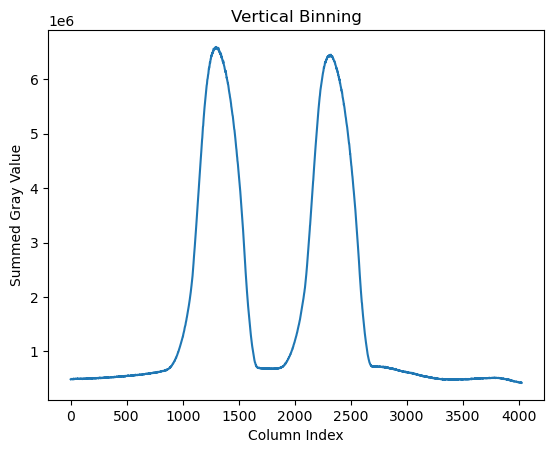

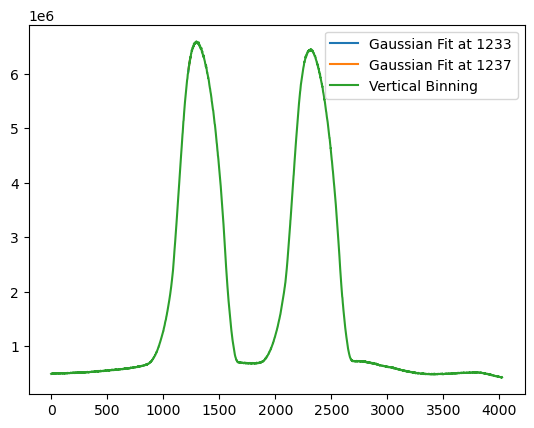

Peak 1 FWHM: 395.98 columns
Peak 2 FWHM: 240.21 columns


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Define Gaussian function for fitting
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Calculate vertical binning
vertical_binning = np.sum(img, axis=0)

# Plot the vertical binning to visually identify the peaks
plt.figure()
plt.plot(vertical_binning)
plt.xlabel('Column Index')
plt.ylabel('Summed Gray Value')
plt.title('Vertical Binning')
plt.show()

# Find peaks
peaks, _ = find_peaks(vertical_binning, height=0.6*np.max(vertical_binning))  # Adjust height threshold as needed
peak_positions = peaks[:2]  # Assume first two peaks are the desired ones

# Fit Gaussian functions to each peak
fwhm_values = []
for peak in peak_positions:
    x_data = np.arange(peak - 10, peak + 10)
    y_data = vertical_binning[peak - 10:peak + 10]

    popt, _ = curve_fit(gaussian, x_data, y_data, p0=[np.max(y_data), peak, 1])

    # Calculate FWHM
    sigma = popt[2]
    fwhm = 2.355 * sigma
    fwhm_values.append(fwhm)

    # Plot the fit
    plt.plot(x_data, gaussian(x_data, *popt), label=f'Gaussian Fit at {peak}')

plt.plot(vertical_binning, label='Vertical Binning')
plt.legend()
plt.show()

# Print FWHM values
for i, fwhm in enumerate(fwhm_values):
    print(f'Peak {i+1} FWHM: {fwhm:.2f} columns')
